In [42]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
import string

from sklearn.model_selection import StratifiedShuffleSplit
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
display(df.head())

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


*There are no missing values in the dataset which is good not having to deal with missing data*

In [26]:
TARGET = 'author'
target_classes = list(df[TARGET].unique())

['EAP', 'HPL', 'MWS']

In [5]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

# Get the indices for the validation set
for _, test_indx in sss.split(df, df[TARGET]):
    valid_df = df.iloc[test_indx]
    train_df = df.drop(test_indx)

display(len(valid_df)), display(len(train_df))

3916

15663

(None, None)

In [6]:
def get_percentage_of_unique(df, target_variable):
    value_counts = df[target_variable].value_counts()

    total_count = len(df)

    percentage = (value_counts / total_count) * 100

    return percentage

print(get_percentage_of_unique(df, TARGET)), print(get_percentage_of_unique(train_df, TARGET)), print(get_percentage_of_unique(valid_df, TARGET))

author
EAP    40.349354
MWS    30.869809
HPL    28.780837
Name: count, dtype: float64
author
EAP    40.349869
MWS    30.868927
HPL    28.781204
Name: count, dtype: float64
author
EAP    40.347293
MWS    30.873340
HPL    28.779367
Name: count, dtype: float64


(None, None, None)

*After using SSS to split the data, the target value split stays relatively the same so now to check if the wordcloud for the splits are still similar to the original for the text column. This will give confidence to use a smaller dataset to do fast and dirty runs before using the complete data to save on time*

- Compare the word cloud for complete, train, validation and test datasets

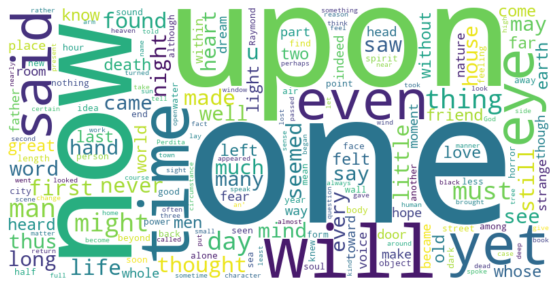

In [7]:
def generate_wordcloud(df, feature=None, target_variable=None, target_value=None):
    if target_variable == None:
        text = ' '.join(df[feature].astype(str).tolist())
    else:
        text = ' '.join(df[df[target_variable] == target_value][feature].astype(str).tolist())

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



generate_wordcloud(df, 'text')

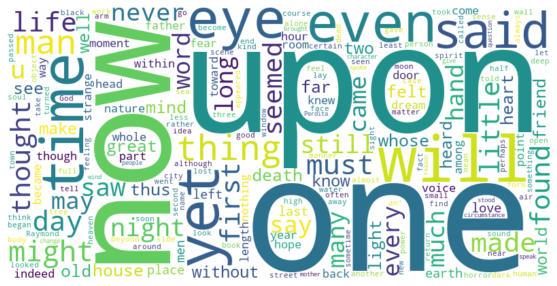

In [8]:
generate_wordcloud(train_df, 'text')

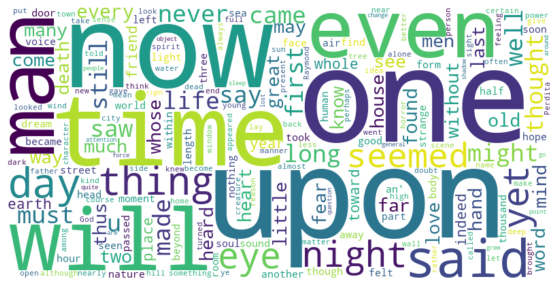

In [9]:
generate_wordcloud(valid_df, 'text')

*The wordcloud for the original and train are similar although 'upon' and 'one' are bigger in the original but the validation set has the word 'man' more prominent. Could this be a problem? Potentially!*

*The test set has the word 'now' prominent more than in any other dataset split*

*Now to visualize the wordcloud for each target variable in the complete/original dataset*

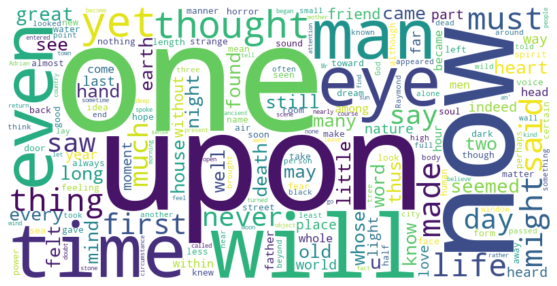

In [10]:
generate_wordcloud(df_test, 'text')

- Compare the wordcloud for each target in complete, train and validation datasets

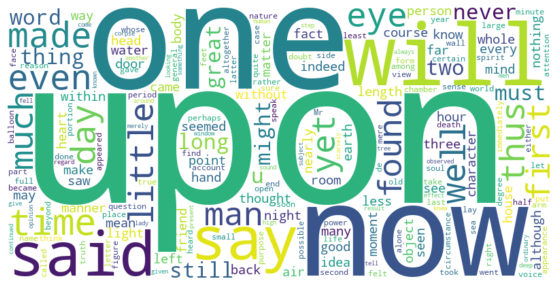

In [11]:
# EAP    40.349354
# MWS    30.869809
# HPL    28.780837

generate_wordcloud(df, 'text', 'author', 'EAP')

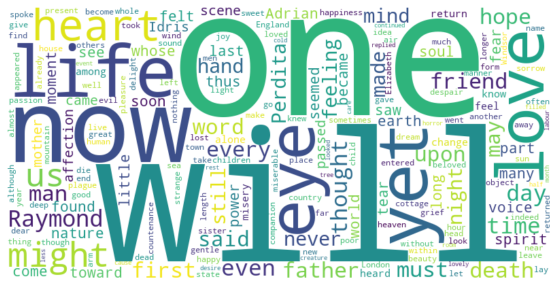

In [12]:
generate_wordcloud(df, 'text', 'author', 'MWS')

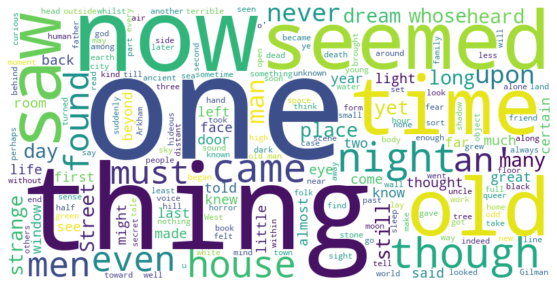

In [13]:
generate_wordcloud(df, 'text', 'author', 'HPL')

*EAP is the reason the word 'upon' is so prominent. First, his word is 40% of the dataset and he uses quite a lot*

*The word 'one' is favoured by EAP and MWP, old timey english? I think so but some more visualization might do the trick!*

*HPL does not favour one single word but has a wider spread of words that occur frequently in his/her text*

- Check samples for each target variable value

In [14]:
df[df['author'] == 'EAP'].head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
11,id16607,"Here we barricaded ourselves, and, for the pre...",EAP
14,id17189,But a glance will show the fallacy of this idea.,EAP
16,id08441,"To these speeches they gave, of course, their ...",EAP
18,id14862,I even went so far as to speak of a slightly h...,EAP
20,id11411,Now the net work was not permanently fastened ...,EAP


*EAP seems to like the use of adverbs. Using NLP to find how many parts of speech (POS) are in each text can help emperically prove this theory*

In [15]:
df[df['author'] == 'MWS'].head(10)

,id,text,author
3,id27763,How lovely is spring As we looked from Windsor...,MWS
5,id22965,"A youth passed in solitude, my best years spen...",MWS
9,id00912,I confess that neither the structure of langua...,MWS
10,id16737,He shall find that I can feel my injuries; he ...,MWS
15,id12799,"He had escaped me, and I must commence a destr...",MWS
17,id13117,Her native sprightliness needed no undue excit...,MWS
31,id00764,"I was rich and young, and had a guardian appoi...",MWS
32,id00683,"We could make out little by the dim light, but...",MWS
37,id05258,"His soul overflowed with ardent affections, an...",MWS
43,id20751,"The visits of Merrival to Windsor, before freq...",MWS


- Plot the various distributions

In [16]:
df_eap = df[df['author'] == 'EAP']
df_mws = df[df['author'] == 'MWS']
df_hpl = df[df['author'] == 'HPL']

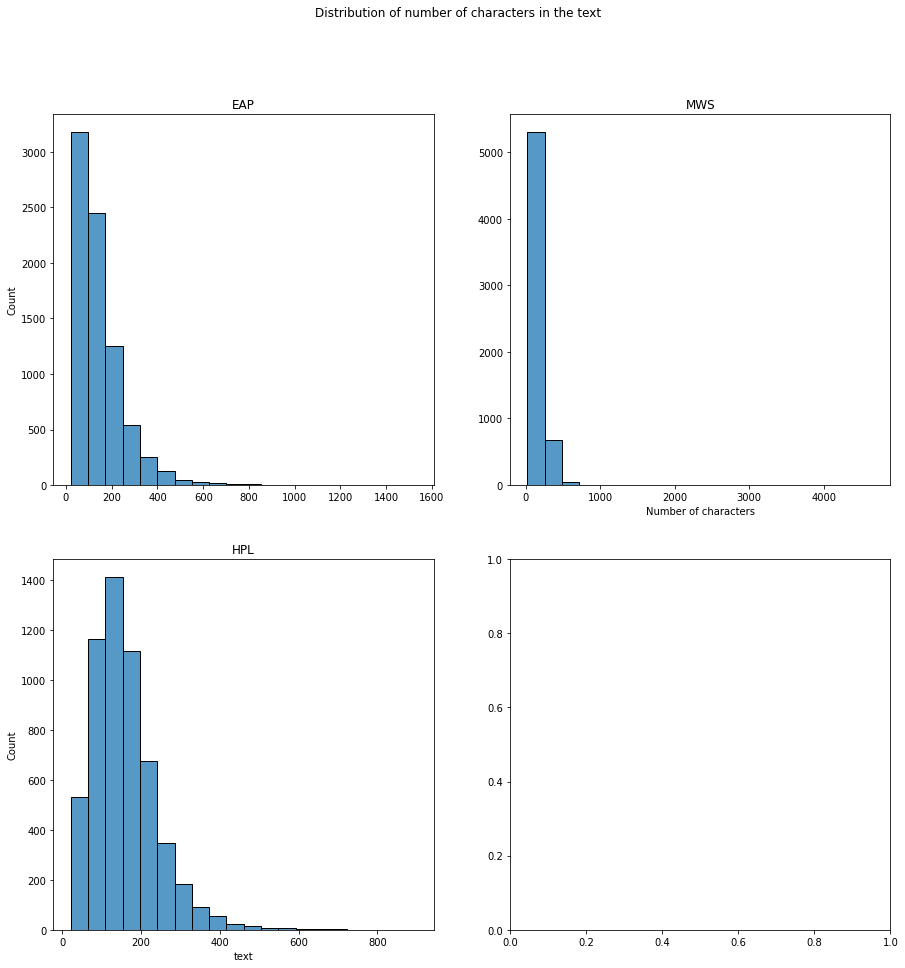

In [17]:
bins = 20

# Distribution of number of characters in text
df_eap_char = df_eap['text'].str.len()
df_mws_char = df_mws['text'].str.len()
df_hpl_char = df_hpl['text'].str.len()

fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharey=False)
sns.histplot(x=df_eap_char, bins=bins, ax=ax[0,0]).set_title('EAP')
sns.histplot(x=df_mws_char, bins=bins, ax=ax[0,1]).set_title('MWS')
sns.histplot(x=df_hpl_char, bins=bins, ax=ax[1, 0]).set_title('HPL')

fig.suptitle('Distribution of number of characters in the text')

for i in range(3):
    ax[i // 2, i % 2].set_xlabel(' ') if i // 2 == 0 else ax[1 // 2, 1 % 2].set_xlabel('Number of characters')
    if i % 2 != 0: ax[1 // 2, i % 2].set_ylabel(' ')

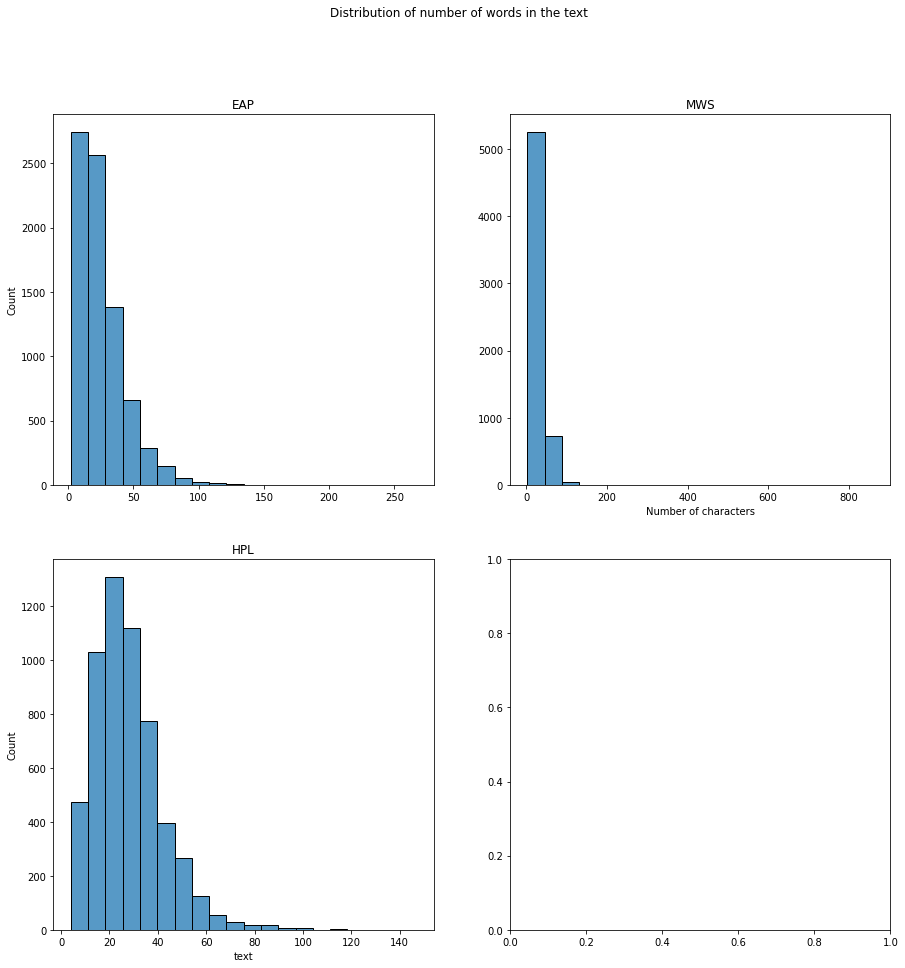

In [18]:
bins = 20

# Distribution of number of words in text
df_eap_word = df_eap['text'].str.split().map(lambda x: len(x))
df_mws_word = df_mws['text'].str.split().map(lambda x: len(x))
df_hpl_word = df_hpl['text'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharey=False)
sns.histplot(x=df_eap_word, bins=bins, ax=ax[0,0]).set_title('EAP')
sns.histplot(x=df_mws_word, bins=bins, ax=ax[0,1]).set_title('MWS')
sns.histplot(x=df_hpl_word, bins=bins, ax=ax[1, 0]).set_title('HPL')

fig.suptitle('Distribution of number of words in the text')

for i in range(3):
    ax[i // 2, i % 2].set_xlabel(' ') if i // 2 == 0 else ax[1 // 2, 1 % 2].set_xlabel('Number of characters')
    if i % 2 != 0: ax[1 // 2, i % 2].set_ylabel(' ')

**Edgar Allan Poe (EAP):**
- The majority of Edgar Allan Poe's texts have a word count ranging up to 250.
- The mean word count is 25, which indicates that on average, his texts are relatively short.
- The distribution might be skewed towards lower word counts, with fewer texts having a higher word count.

**Mary Shelley (MWS):**
- The word count range for Mary Shelley's texts is broader, extending up to 800 words.
- The mean word count is 50, which is higher than that of Edgar Allan Poe, suggesting that her texts tend to be longer on average.
- The distribution might be relatively more spread out compared to Edgar Allan Poe's, with a significant number of texts having higher word counts.

**H.P. Lovecraft (HPL):**
- The word count range for H.P. Lovecraft's texts is narrower, reaching up to 140 words.
- The mean word count is 20, indicating that his texts are relatively short, similar to Edgar Allan Poe's.
- The distribution might also be skewed towards lower word counts, with a concentration of texts having fewer words

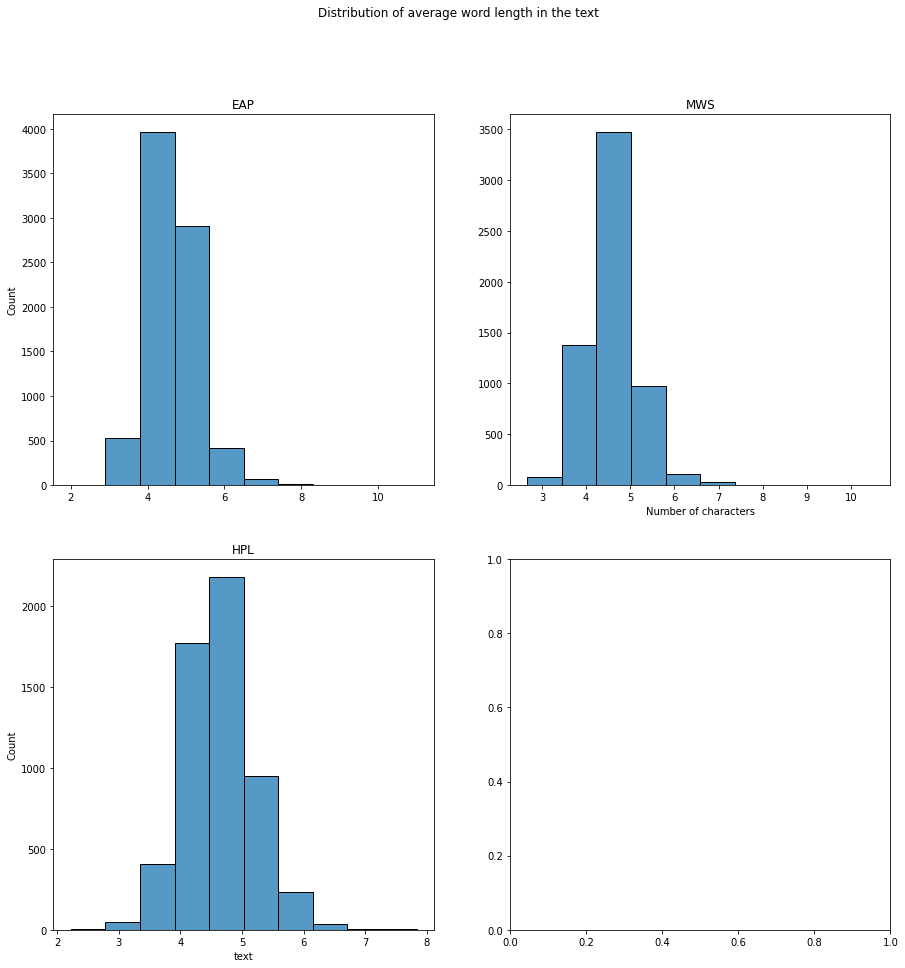

In [19]:
bins = 10

# Distribution of average word length in text
df_eap_avg = df_eap['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
df_mws_avg = df_mws['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
df_hpl_avg = df_hpl['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharey=False)
sns.histplot(x=df_eap_avg, bins=bins, ax=ax[0,0]).set_title('EAP')
sns.histplot(x=df_mws_avg, bins=bins, ax=ax[0,1]).set_title('MWS')
sns.histplot(x=df_hpl_avg, bins=bins, ax=ax[1, 0]).set_title('HPL')

fig.suptitle('Distribution of average word length in the text')

for i in range(3):
    ax[i // 2, i % 2].set_xlabel(' ') if i // 2 == 0 else ax[1 // 2, 1 % 2].set_xlabel('Number of characters')
    if i % 2 != 0: ax[1 // 2, i % 2].set_ylabel(' ')

All 3 authors have similar average word length of around 5 although it seems MWS has a higher lower bounds of 3 compared to the other authors, meaning the author uses longer words more often in text.

HPL has lower higher bounds of 8 compared to the other 2 others who are around 10, meaning HPL uses longer words much less often.

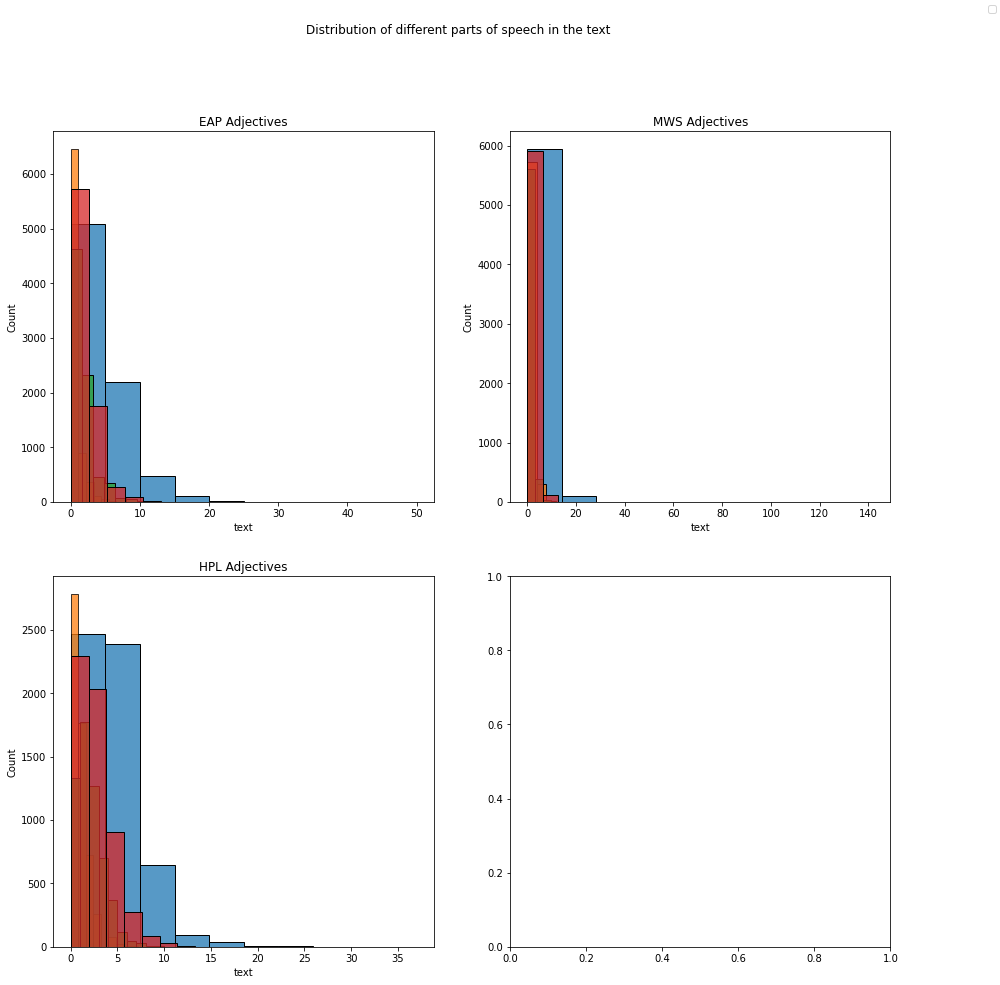

In [20]:
# Function to get the distribution of different parts of speech
def get_pos_distribution(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)
    return pos_counts

# Distribution of parts of speech in text
df_eap_pos = df_eap['text'].apply(get_pos_distribution)
df_mws_pos = df_mws['text'].apply(get_pos_distribution)
df_hpl_pos = df_hpl['text'].apply(get_pos_distribution)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharey=False)

colors = sns.color_palette('tab10', n_colors=4)

sns.histplot(df_eap_pos.apply(lambda x: x['NN']), bins=bins, ax=ax[0,0], color=colors[0]).set_title('EAP Nouns')
sns.histplot(df_mws_pos.apply(lambda x: x['NN']), bins=bins, ax=ax[0,1], color=colors[0]).set_title('MWS Nouns')
sns.histplot(df_hpl_pos.apply(lambda x: x['NN']), bins=bins, ax=ax[1,0], color=colors[0]).set_title('HPL Nouns')

sns.histplot(df_eap_pos.apply(lambda x: x['VB']), bins=bins, ax=ax[0,0], color=colors[1]).set_title('EAP Verbs')
sns.histplot(df_mws_pos.apply(lambda x: x['VB']), bins=bins, ax=ax[0,1], color=colors[1]).set_title('MWS Verbs')
sns.histplot(df_hpl_pos.apply(lambda x: x['VB']), bins=bins, ax=ax[1,0], color=colors[1]).set_title('HPL Verbs')

sns.histplot(df_eap_pos.apply(lambda x: x['RB']), bins=bins, ax=ax[0,0], color=colors[2]).set_title('EAP Adverbs')
sns.histplot(df_mws_pos.apply(lambda x: x['RB']), bins=bins, ax=ax[0,1], color=colors[2]).set_title('MWS Adverbs')
sns.histplot(df_hpl_pos.apply(lambda x: x['RB']), bins=bins, ax=ax[1,0], color=colors[2]).set_title('HPL Adverbs')

sns.histplot(df_eap_pos.apply(lambda x: x['JJ']), bins=bins, ax=ax[0,0], color=colors[3]).set_title('EAP Adjectives')
sns.histplot(df_mws_pos.apply(lambda x: x['JJ']), bins=bins, ax=ax[0,1], color=colors[3]).set_title('MWS Adjectives')
sns.histplot(df_hpl_pos.apply(lambda x: x['JJ']), bins=bins, ax=ax[1,0], color=colors[3]).set_title('HPL Adjectives')

fig.suptitle('Distribution of different parts of speech in the text')

# Create legend
handles, labels = [], []
for ax_row in ax:
    for ax_col in ax_row:
        for handle, label in zip(*ax_col.get_legend_handles_labels()):
            handles.append(handle)
            labels.append(label)
fig.legend(handles, labels, loc='upper right')

plt.show()

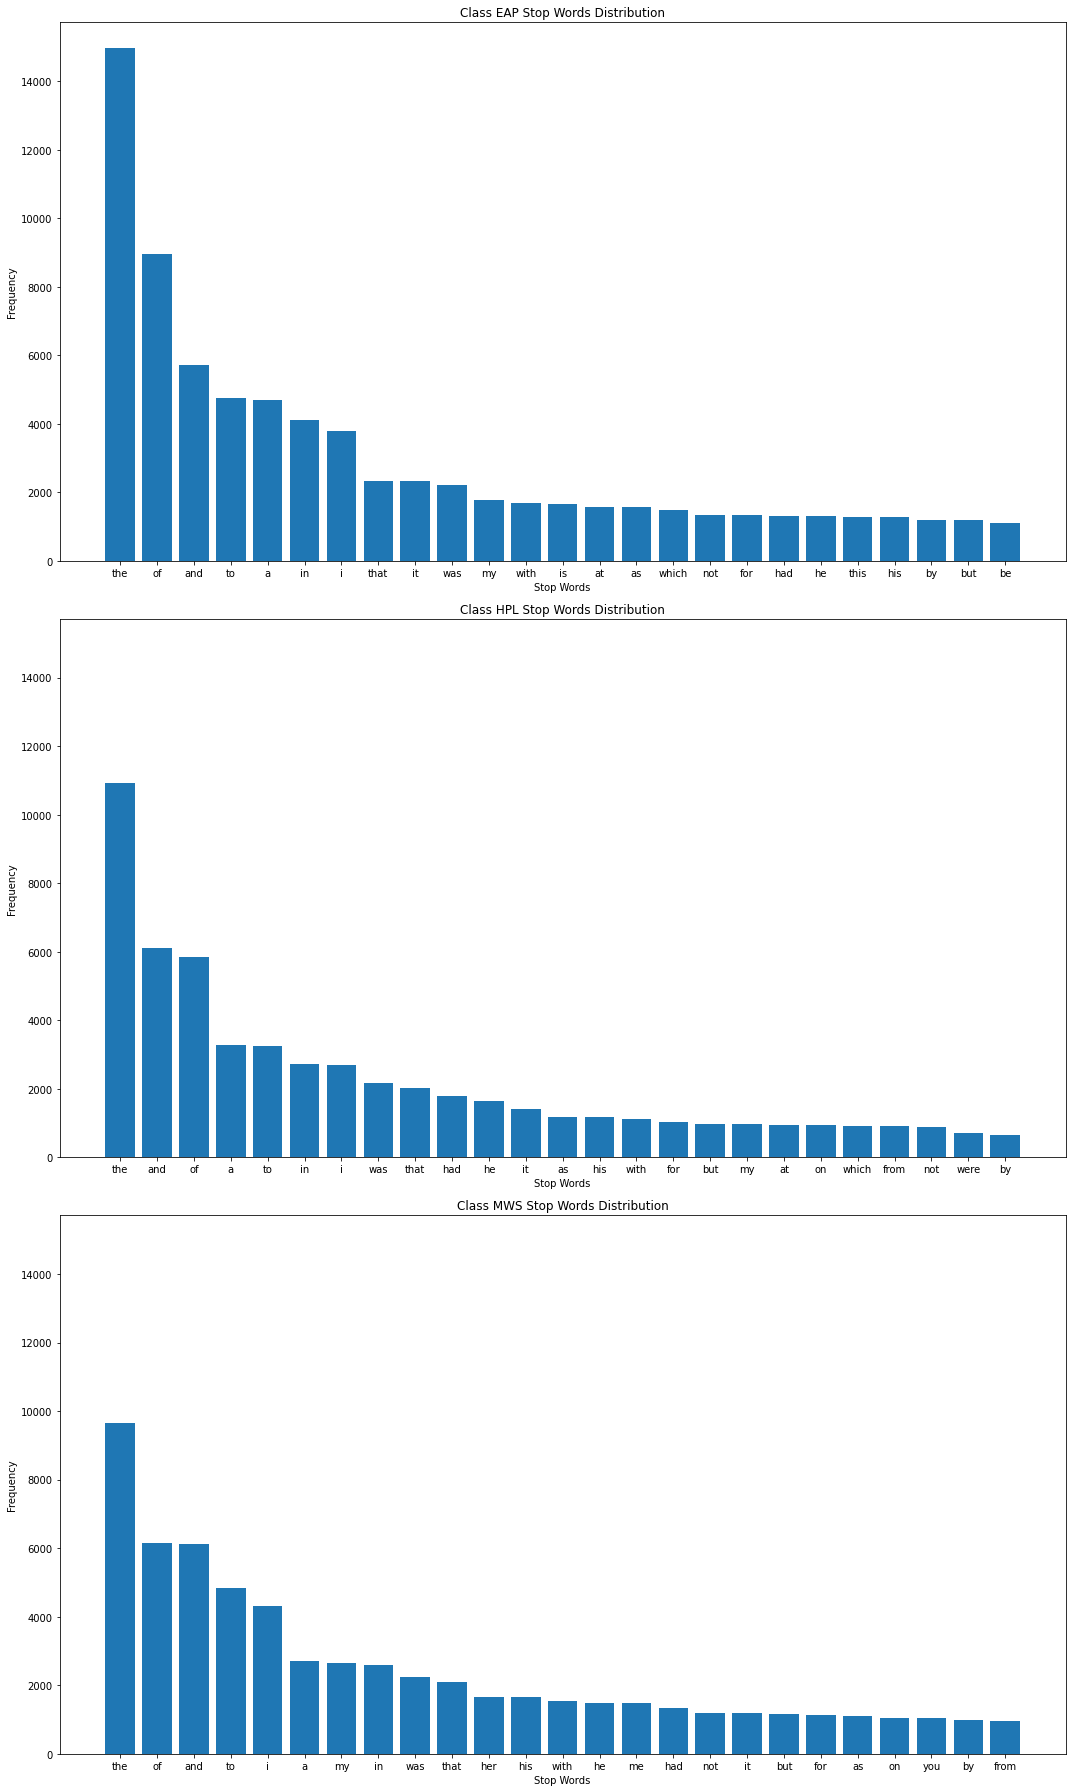

In [36]:
# Plot distribution of stop words

stop_words = set(stopwords.words('english'))

fig, axs = plt.subplots(3, 1, figsize=(15, 25), sharey=True)

for i, class_label in enumerate(set(target_classes)):
    # class_texts = [df['text'][j] for j, label in enumerate(target_classes) if label == class_label]
    class_texts = df.loc[df[TARGET] == class_label, 'text']

    stop_words_count = Counter()
    for text in class_texts:
        words = nltk.word_tokenize(text.lower())
        stop_words_count.update([word for word in words if word in stop_words])

    # Select the top 25 stop words
    top_stop_words_count = dict(stop_words_count.most_common(25))

    # Plot
    axs[i].bar(top_stop_words_count.keys(), top_stop_words_count.values())
    axs[i].set_title(f'Class {class_label} Stop Words Distribution')
    axs[i].set_xlabel('Stop Words')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

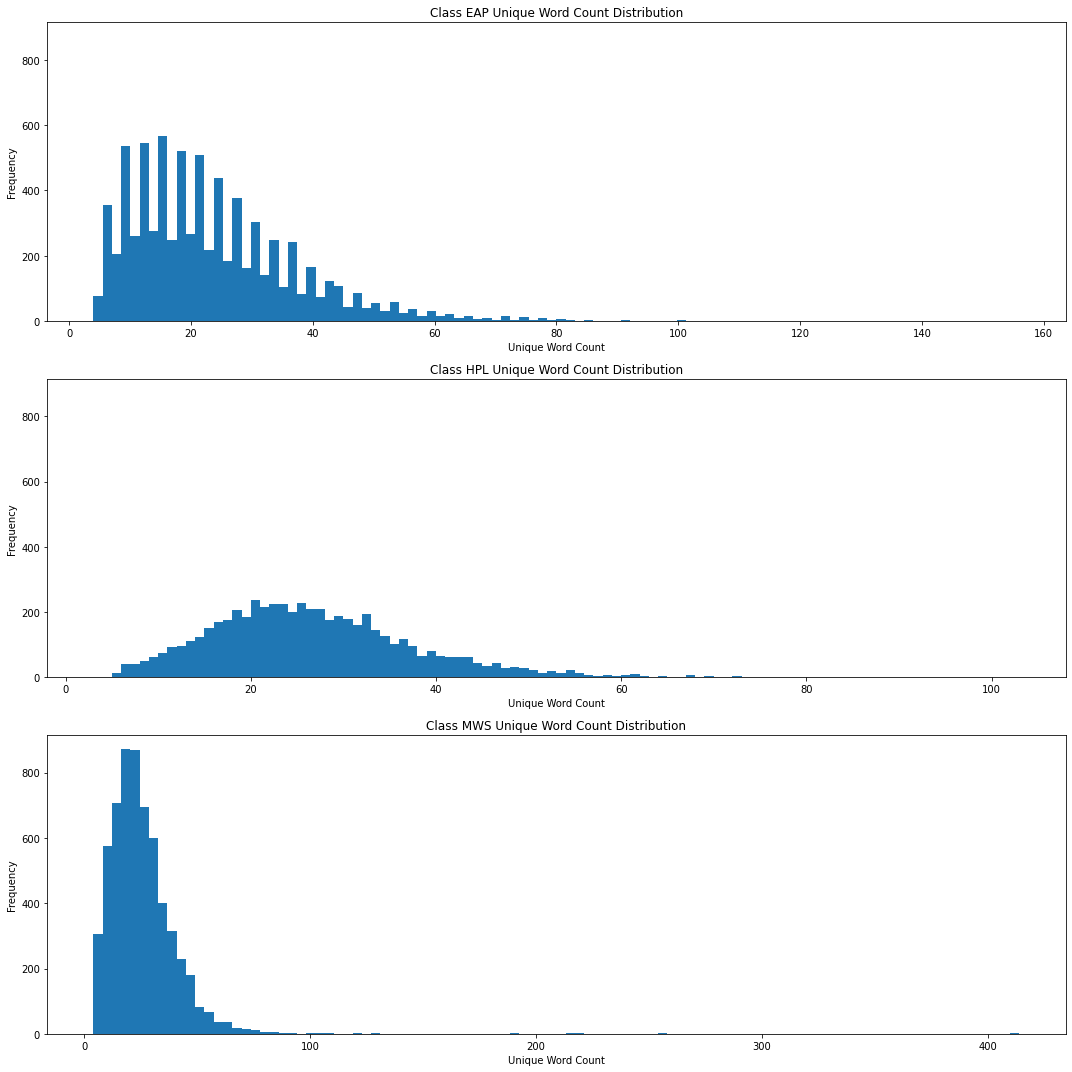

In [41]:
# Create subplots
fig, axs = plt.subplots(len(df[TARGET].unique()), 1, figsize=(15, 15), sharey=True)

# Plot distribution of unique word count for each class
for i, class_label in enumerate(df[TARGET].unique()):
    # Filter DataFrame by class
    class_texts = df.loc[df[TARGET] == class_label, 'text']
    
    # Tokenize and count unique words
    unique_word_count = []
    for text in class_texts:
        words = set(nltk.word_tokenize(text.lower()))
        unique_word_count.append(len(words))
    
    # Plot
    axs[i].hist(unique_word_count, bins=100)
    axs[i].set_title(f"Class {class_label} Unique Word Count Distribution")
    axs[i].set_xlabel("Unique Word Count")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [44]:
# Check for rows with the unusually high counts
def count_unique_words(text):
    words = set(nltk.word_tokenize(text.lower()))
    return len(words)

df['unique_word_count'] = df['text'].apply(count_unique_words)

df[df['unique_word_count'] > 200]

,id,text,author,unique_word_count
3956,id20439,To chambers of painted state farewell To midni...,MWS,218
9215,id27184,Diotima approached the fountain seated herself...,MWS,414
10939,id13677,They are gone for ever great as my power is I ...,MWS,216
18107,id17485,Oh no I will become wise I will study my own h...,MWS,257


*If the count of unique words is more than 160, surely it has to be MWS' work. I think this should be a feature (unique_word_count_greater_200). Why 200? Looks cleaner and polished*

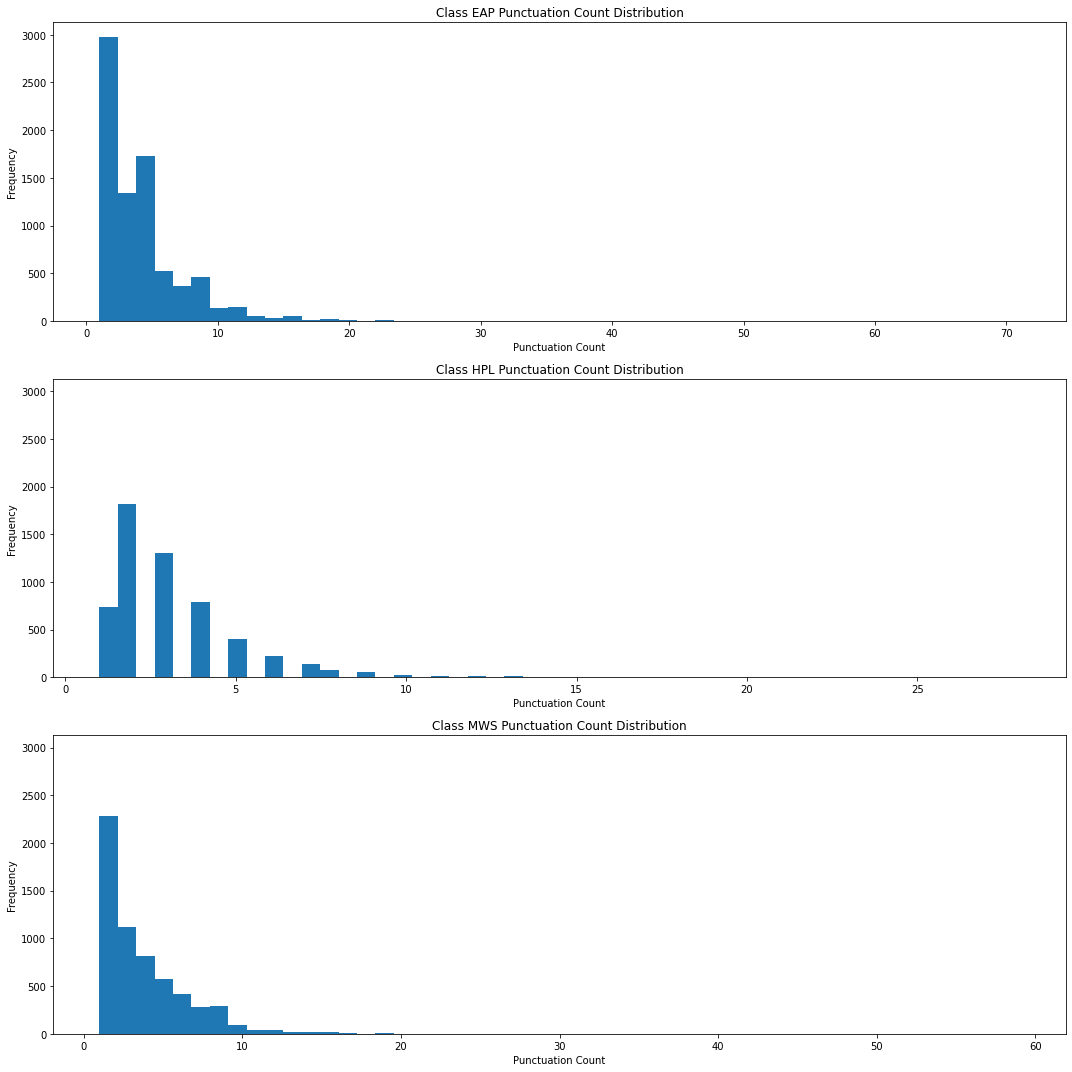

In [43]:
# Create subplots
fig, axs = plt.subplots(len(df[TARGET].unique()), 1, figsize=(15, 15), sharey=True)

# Plot distribution of unique word count for each class
for i, class_label in enumerate(df[TARGET].unique()):
    # Filter DataFrame by class
    class_texts = df.loc[df[TARGET] == class_label, 'text']
    
    # Tokenize and count unique words
    punctuation_count = []
    for text in class_texts:
        count = sum(1 for char in text if char in string.punctuation)
        punctuation_count.append(count)
    
    # Plot
    axs[i].hist(punctuation_count, bins=50)
    axs[i].set_title(f"Class {class_label} Punctuation Count Distribution")
    axs[i].set_xlabel("Punctuation Count")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

*HPL is clearly not a big fan of using punctuations, his mean is around 3 which is similar to the other authors but his top usage is around 25 for his really long text. But then from earlier we already know he uses less unique words, less words in general*